# run magicAnimate

In [6]:
import os 
# os.chdir("/media/Ext_4T_SSD/ASHOK_PART2/magic-animate")
os.chdir("/media/test/vcl/ASHOK_PART2/Mtech_Project")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [7]:
import argparse
import imageio
import numpy as np
import gradio as gr
from PIL import Image
from demo.animate import MagicAnimate

animator = MagicAnimate()


Initializing MagicAnimate Pipeline...
loaded temporal unet's pretrained weights from pretrained_models/stable-diffusion-v1-5/unet ...
### missing keys: 560; 
### unexpected keys: 0;
### Temporal Module Parameters: 417.1376 M


The config attributes {'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'addition_time_embed_dim': None, 'conditioning_channels': 3, 'encoder_hid_dim': None, 'encoder_hid_dim_type': None, 'global_pool_conditions': False, 'num_attention_heads': None, 'transformer_layers_per_block': 1} were passed to ControlNetModel, but are not expected and will be ignored. Please verify your config.json configuration file.
It is recommended to provide `attention_head_dim` when calling `get_down_block`. Defaulting `attention_head_dim` to 8.
It is recommended to provide `attention_head_dim` when calling `get_down_block`. Defaulting `attention_head_dim` to 8.
It is recommended to provide `attention_head_dim` when calling `get_down_block`. Defaulting `attention_head_dim` to 8.
It is recommended to provide `attention_head_dim` when calling `get_down_block`. Defaulting `attention_head_dim` to 8.
It is recommended to provide `attention_head_dim` when calling `get_down_block`. Defaulting `atte

Initialization Done!


In [9]:

# def animate(*args, **kwargs):
#     print("running animate")
#     return animator(*args, **kwargs)

# Define a function to read a video file
def read_video(video):
    reader = imageio.get_reader(video)
    fps = reader.get_meta_data()['fps']
    return video

# Define a function to read an image file
def read_image(image, size=512):
    return np.array(Image.fromarray(image).resize((size, size)))



In [10]:
# Example inputs
reference_image_path = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/lab_presentation/lady_standing_540.jpg"
motion_sequence_path = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/lab_presentation/seg_videos/segmentation_mask_fat_1.mp4"
motion_sequence_path_keypoints = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/lab_presentation/lady_standing_resized_keypoints_540.mp4"


In [11]:
# # Example inputs
# reference_image_path = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/sample_datapoint/demo4.png"
# motion_sequence_path = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/sample_datapoint/demo4.mp4"
# motion_sequence_path_keypoints = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/sample_datapoint/control_keypoint_demo4.mp4"

random_seed = 1
sampling_steps = 25
guidance_scale = 7.5

# Read the reference image and motion sequence
reference_image = read_image(np.array(Image.open(reference_image_path)))
motion_sequence = read_video(motion_sequence_path)
motion_sequence_keypoints = read_video(motion_sequence_path_keypoints)

result = animator(reference_image, motion_sequence, random_seed, sampling_steps, guidance_scale, motion_sequence_keypoints=motion_sequence_keypoints)

100%|██████████| 32/32 [00:01<00:00, 16.15it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1544, 516) to (1552, 528) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x59c0dc0] Warning: data is not aligned! This can lead to a speed loss


# running with folder in loop : for lab presentation

In [ ]:
images_folder = '/media/test/vcl/ASHOK_PART2/DATA/RUN_2/images'
image_names = os.listdir(images_folder)

seg_videos_folder = '/media/test/vcl/ASHOK_PART2/DATA/RUN_2/seg_videos'
keypoint_videos_folder = '/media/test/vcl/ASHOK_PART2/DATA/RUN_2/keypoint_videos'


for image_name in image_names: 
    # # Example inputs
    # reference_image_path = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/lab_presentation/lady_standing_540.jpg"
    # motion_sequence_path = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/lab_presentation/seg_videos/segmentation_mask_fat_1.mp4"
    # motion_sequence_path_keypoints = "/media/test/vcl/ASHOK_PART2/Mtech_Project/DATA/lab_presentation/lady_standing_resized_keypoints_540.mp4"
    
    reference_image_path = os.path.join(images_folder, image_name)
    motion_sequence_path = os.path.join(seg_videos_folder, image_name.split('.')[0] + '.mp4')
    motion_sequence_path_keypoints = os.path.join(keypoint_videos_folder, image_name.split('.')[0] + '.mp4')
    
    #check if the file exists
    if not os.path.exists(motion_sequence_path):
        continue
    #

    random_seed = 1
    sampling_steps = 25
    guidance_scale = 7.5

    # Read the reference image and motion sequence
    reference_image = read_image(np.array(Image.open(reference_image_path)))
    motion_sequence = read_video(motion_sequence_path)
    motion_sequence_keypoints = read_video(motion_sequence_path_keypoints)

    result = animator(reference_image, motion_sequence, random_seed, sampling_steps, guidance_scale, motion_sequence_keypoints=motion_sequence_keypoints)

# Explore the args of controlnet

In [6]:
 result.keys()

dict_keys(['controlnet_latent_input', 'controlnet_text_embeddings', 'controlnet_uncond_images', 'controlnet_cond_images', 'controlnet_res_samples_cache_dict', 'context', 'do_classifier_free_guidance', 'b', 'f'])

float16


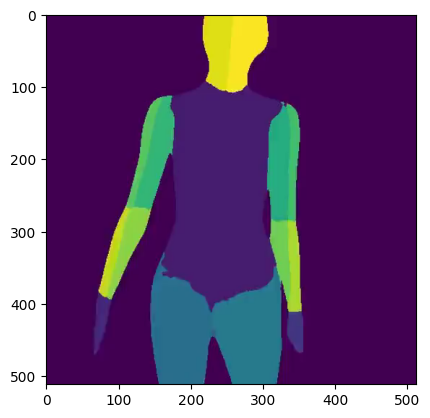

In [13]:
result['controlnet_cond_images'].shape #torch.Size([112, 3, 512, 512])

#show one of the images

# plt.imshow(result['controlnet_cond_images'][0].permute(1, 2, 0))

img = result['controlnet_cond_images'][0].permute(1, 2, 0).cpu().numpy() 
print(img.dtype) #float16
img = img * 255
img = img.astype(np.uint8)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


float16


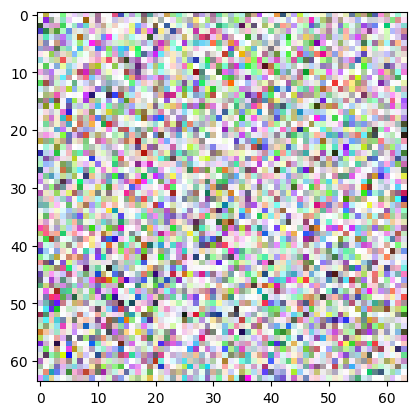

In [15]:
result['controlnet_latent_input'].shape #torch.Size([112, 3, 512, 512])

#show one of the images

# plt.imshow(result['controlnet_cond_images'][0].permute(1, 2, 0))

img = result['controlnet_latent_input'][0].permute(1, 2, 0).cpu().numpy() 
print(img.dtype) #float16
img = img * 255
img = img.astype(np.uint8)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


In [17]:
result['controlnet_text_embeddings'].shape #torch.Size([224, 77, 768])

torch.Size([224, 77, 768])

float16


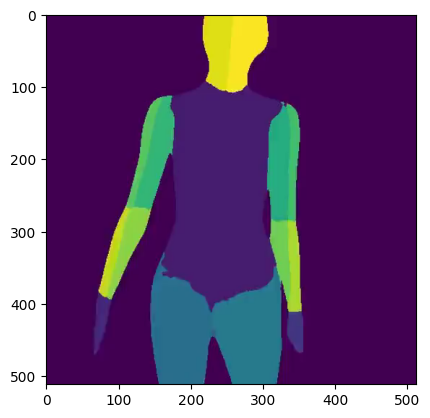

In [19]:
result['controlnet_uncond_images'].shape #torch.Size([112, 3, 512, 512])

#show one of the images

# plt.imshow(result['controlnet_cond_images'][0].permute(1, 2, 0))

img = result['controlnet_uncond_images'][0].permute(1, 2, 0).cpu().numpy() 
print(img.dtype) #float16
img = img * 255
img = img.astype(np.uint8)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()


## prepare condition    

In [23]:
import torch
from einops import rearrange

def prepare_condition(condition, num_videos_per_prompt, device, dtype, do_classifier_free_guidance):
    # prepare conditions for controlnet
    condition = torch.from_numpy(condition.copy()).to(device=device, dtype=dtype) / 255.0
    condition = torch.stack([condition for _ in range(num_videos_per_prompt)], dim=0)
    condition = rearrange(condition, 'b f h w c -> (b f) c h w').clone()
    if do_classifier_free_guidance:
        condition = torch.cat([condition] * 2)
    return condition


In [26]:
cond = "/media/test/vcl/ASHOK_PART2/Mtech_Project/inputs/applications/driving/densepose/dancing2.mp4"
#change video to numpy array
import cv2
cap = cv2.VideoCapture(cond)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()
frames = np.stack(frames)
frames.shape


(100, 512, 512, 3)

In [41]:
prepared = prepare_condition(frames, 1, 'cuda', torch.float16, True)

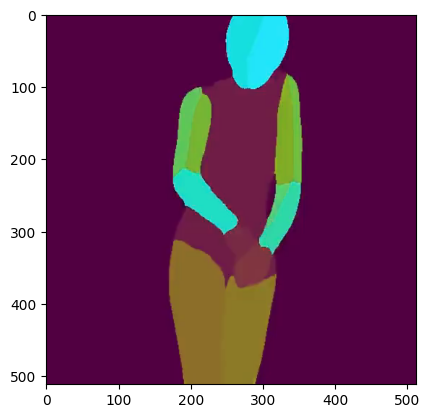

In [43]:
# show one of the images
# plt.imshow(frames[0])
prepared = prepared[0]*255 #torch.Size([200, 3, 512, 512])
plt.imshow(prepared.permute(1, 2, 0).cpu().numpy().astype(np.uint8))

In [42]:
prepared.shape

torch.Size([200, 3, 512, 512])